In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

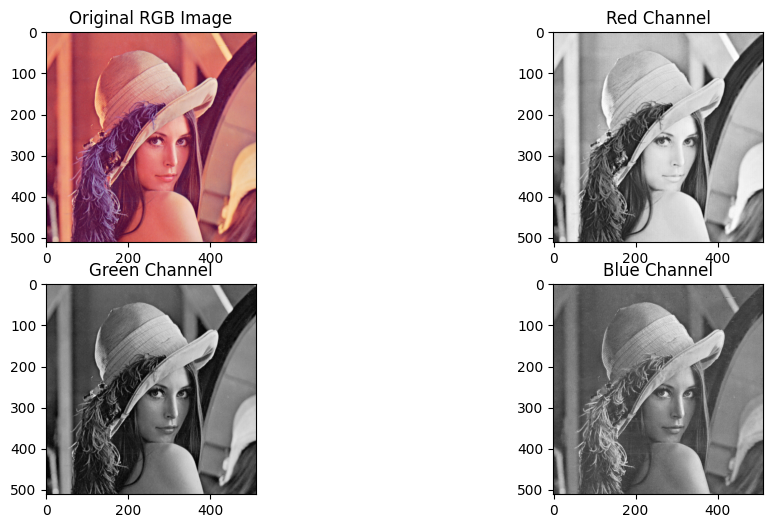

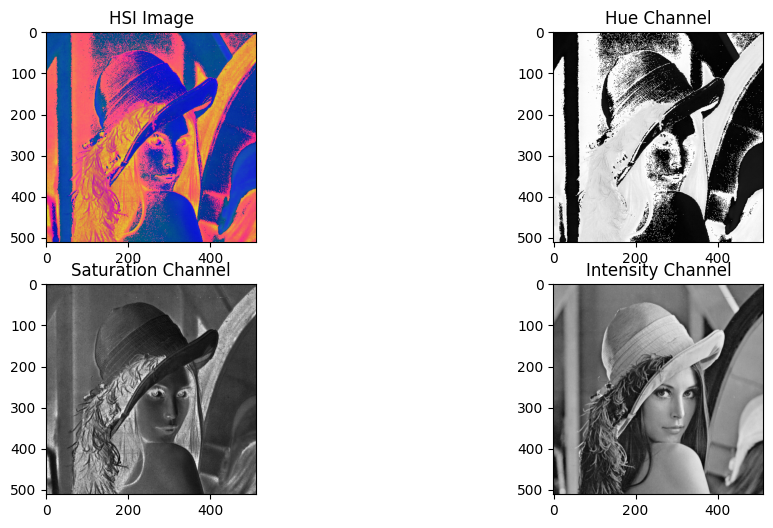

In [10]:
def rgb_to_hsi(rgb_image):
    rgb_image = rgb_image / 255.0
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    i = (r + g + b) / 3.0
    min_rgb = np.minimum(np.minimum(r, g), b)
    s = 1- 3 * min_rgb / (r + g + b)
    s[np.isnan(s)] = 0
    num = 0.5 * ((r- g) + (r - b))
    den = np.sqrt((r - g)**2 + (r - b) * (g - b))
    theta = np.arccos(num / (den + 1e-8))
    h = theta
    h[g < b] = 2 * np.pi - h[g < b]
    h = h / (2 * np.pi)
    hsi_image = np.stack([h, s, i], axis=-1)
    return hsi_image
image_path = '/content/drive/MyDrive/coloured.png'
bgr_image = cv2.imread(image_path)
if bgr_image is not None:
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    hsi_image = rgb_to_hsi(rgb_image)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(rgb_image)
    plt.title('Original RGB Image')
    plt.subplot(2, 2, 2)
    plt.imshow(rgb_image[:, :, 0], cmap='gray')
    plt.title('Red')
    plt.subplot(2, 2, 3)
    plt.imshow(rgb_image[:, :, 1], cmap='gray')
    plt.title('Green')
    plt.subplot(2, 2, 4)
    plt.imshow(rgb_image[:, :, 2], cmap='gray')
    plt.title('Blue')
    plt.figure(figsize=(12,6))
    plt.subplot(2,2,1)
    plt.imshow(hsi_image)
    plt.title('HSI Image')
    plt.subplot(2,2,2)
    plt.imshow(hsi_image[:,:,0], cmap='gray')
    plt.title('Hue Channel')
    plt.subplot(2,2,3)
    plt.imshow(hsi_image[:,:,1], cmap='gray')
    plt.title('Saturation Channel')
    plt.subplot(2,2,4)
    plt.imshow(hsi_image[:,:,2], cmap='gray')
    plt.title('Intensity Channel')
    plt.show()
else:
    print(f"Not foubd at this place {image_path}")

question 2

Mounting drive

In [20]:
image_path = '/content/drive/MyDrive/Watershed.PNG'
bgr_image = cv2.imread(image_path)

Applying Gaussian blur to reduce the noise of the given image

In [21]:
gray = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)

Using canny edge detection method for detection of edges

In [22]:
edges = cv2.Canny(gray,50,150)

Using thresholding the markers are defined

In [23]:
ret, markers = cv2.connectedComponents(edges)

Adding 1 to all the lables so that background will be 1 bnot zero

In [24]:
markers = markers+1

Marking unknown places with 0

In [25]:
markers[edges==255] = 0

Applying watershed algoritm with markers colour with colour code blue



In [26]:
markers = cv2.watershed(bgr_image,markers)
bgr_image[markers == -1] = [255,0,0]

final plot with all the plots

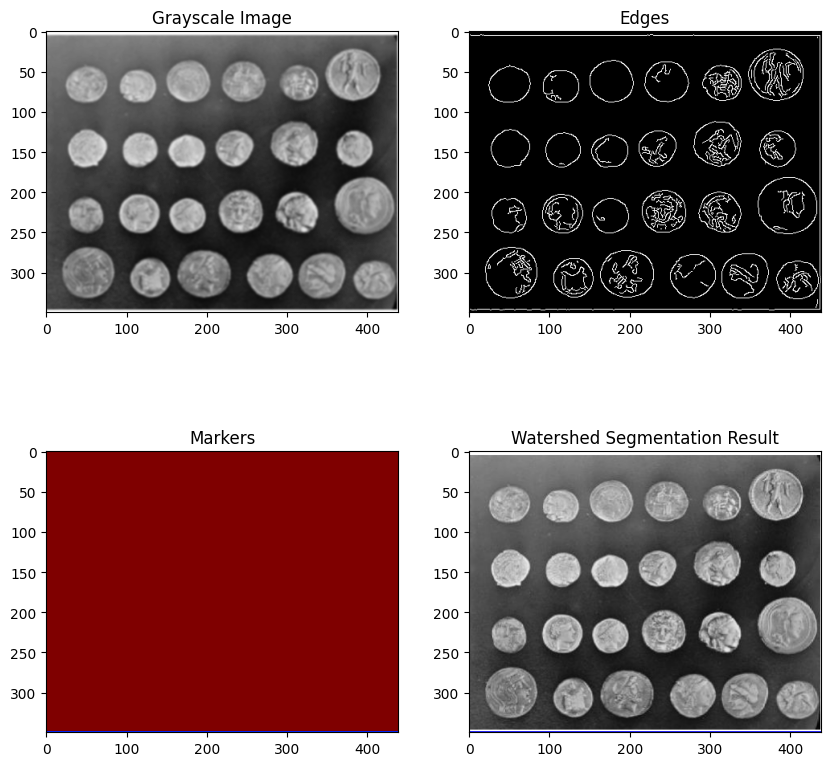

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.subplot(2,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.subplot(2,2,3)
# Use a colormap suitable for labeled regions
plt.imshow(markers, cmap='jet')
plt.title("Markers")
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title("Watershed segmentation Result")
plt.show()


**with formula of water shed without sobel**
import numpy as np
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import matplotlib.pyplot as plt
def apply_watershed(grayscale_image):
    def gaussian_kernel(size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1,-size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2+y**2) / (2.0*sigma**2))) * normal
        return g
    kernel = gaussian_kernel(5, 1)
    filtered_image = ndi.convolve(grayscale_image, kernel, mode='constant', cval=0.0)
    labels = watershed(-distance, markers, mask=edges)
    return labels


In [ ]:
# prompt: # prompt: AIM and procedure for uinput colour image to hsi and plotting r g b and his result
# only text format

AIM: To convert a color image from RGB color space to HSI color space and visualize the results.  Additionally, to perform watershed segmentation on an image.

Procedure for RGB to HSI conversion and plotting:

1.  Import necessary libraries: OpenCV (cv2), NumPy (np), and Matplotlib (pyplot).
2.  Mount Google Drive to access image files.
3.  Define a function `rgb_to_hsi` that takes an RGB image as input.
    *   Normalize the pixel values to the range [0, 1].
    *   Calculate the intensity (I) component.
    *   Calculate the saturation (S) component, handling potential NaN values.
    *   Calculate the hue (H) component using arccos and adjusting for different quadrants.
    *   Normalize the hue to the range [0, 1].
    *   Stack the H, S, and I components to create an HSI image.
    *   Return the HSI image.
4.  Read the input color image from Google Drive using `cv2.imread()`.
5.  Convert the BGR image (read by OpenCV) to RGB format.
6.  Call the `rgb_to_hsi` function to convert the RGB image to HSI.
7.  Create a plot using Matplotlib to visualize:
    *   The original RGB image.
    *   Individual R, G, and B channels of the RGB image (grayscale).
    *   The HSI image.
    *   Individual H, S, and I channels of the HSI image (grayscale).
8.  Display the plots.


Procedure for Watershed Segmentation:

1. Read the input image.
2. Convert the image to grayscale.
3. Apply Gaussian blur to reduce noise.
4. Use Canny edge detection to find edges in the image.
5. Use connected components analysis on the edges to define markers.
6. Add 1 to all labels so the background is not 0.
7. Mark the unknown regions as 0, corresponding to the edges.
8. Apply the watershed algorithm.
9. Mark the boundaries (watershed lines) in the original image (e.g., in blue).
10. Display the grayscale image, edges, markers, and the final watershed segmentation result.

Note: This procedure describes the general process outlined in the provided code. The specific steps and calculations within each part of the code might vary slightly.